**Lab 4: FIR filters and envelopes**

The goal of this lab is to learn how to implement FIR filters in Python, and how we can use them to improve our synthesis.

In [24]:
#!rmdir /s /q sis1_group4
#!git clone https://github.com/lauraceballos01/sis1_group4.git

In [42]:
import os
import numpy as np
import librosa
import IPython.display as ipd
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy;

from util import load_audio, plot_signals, plot_spectrogram, plot_mean_spectrogram, save_audio

**1. Overview of Filtering**

For this lab, we will define an FIR filter as a discrete-time system that converts an input signal $x[n]$ into an output signal $y[n]$ by means of the weighted summation:

$$
y[n] = \sum_{k=0}^M b_kx[n-k]
$$

The function *np.convolve()* is a generic function with which to implement FIR filters. The following code implements a three-point averaging system:

In [26]:
fs = 1
x = [np.floor(x/10) for x in range(50)]
b = np.array([1.0/3, 1.0/3, 1.0/3])
y = np.convolve(b, x)

plot_signals([x, y], fs, name=['input x[n]', 'output y[n]'], mode='lines+markers')

**1.1 Explain the filtering action of the 5-point averager by comparing the plot of the input $x[n]$ and the output $y[n]$. This filter might be called a “smoothing” filter. Note how the transitions from one level to another have been “smoothed.”**

The 5-point averager, is used to smooth or average a signal. It operates by averaging the current sample and four previous samples from the input signal to create a smoother output. This filtering action reduces the impact of high-frequency noise and sharp transitions in the input. We can see this from the example above by noteching how the transitions last longer and have less of an angle of attack. It's an overall smoother graphic than the blue one.

*1.2* Define a function `averaging_filter(x, N)` which implements the N-points averaging filter using the `np.convolve` function.

In [27]:
import numpy as np

def averaging_filter(x, N):
    """
    Applies a N-point averaging filter to the input signal x

    Parameters
    ----------
    x : np.array
        The input signal in the form of a numpy array
    N : int
        The number of points used in N-point averaging filter

    Returns
    -------
    y : np.array
        The output of the filter
    """

    b=np.array([1/N]*N)
    y=np.convolve(b,x)
    return y




In [29]:
reference, fs = load_audio("sis1_group4ukelele.wav")
Audio(reference, rate=fs)

1.3 Run the example above using the `averaging_filter` instead. Change the number N to different values and explain what happen.

In [30]:
fs = 1
x = [np.floor(x/10) for x in range(50)]
b = np.array([1.0/3, 1.0/3, 1.0/3])
y1 = averaging_filter(x,3)
y2 = averaging_filter(x,6)
y3 = averaging_filter(x,9)
y4 = averaging_filter(x,12)
y5 = averaging_filter(x,23)

plot_signals([x, y1, y2, y3, y4, y5], fs, name=['input x[n]', 'output with N=3 y[n]', 'output with N=6 y[n]', 'output with N=9 y[n]', 'output with N=12 y[n]','PEDRO'], mode='lines+markers')

**1.4 How would you classify this filter, as a low-pass o high-pass filter?**

It smooths the signal by averaging a range of samples, which effectively reduces the impact of high-frequency noise or rapid changes in the signal. This behavior makes it a low-pass filter, as it passes the lower-frequency components and attenuates the higher-frequency components, resulting in a smoother signal.







---

**2. Envelope detector**

Now we'll implement an envelope detector by concatenating two systems: a full-wave rectifier (absolute value) and the N-point averaging filter.

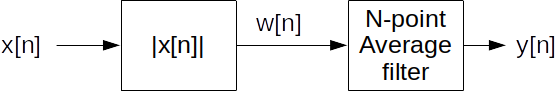

2.1 Define a function `envelope(x, N)` which applies an N-point averaging filter to the full-wave rectified signal and returns the output $y[n]$.

**Note 1**: to calculate the full-wave rectified signal check the `np.abs()` function.

**Note 2**: The output should have the same length as the input signal. Use 'same' mode (see [np.convolve](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) documentation).

In [31]:
import numpy as np
def envelope(x, N):
   """Extracts the envelope of the input signal x

   Parameters
   ----------
    x : np.array
        The input signal in the form of a numpy array
    N : int
        The number of points used in N-point averaging filter

    Returns
    -------
    y : np.array
        The output of the system, i.e the envelope of the signal x.

   """
   x=np.abs(x)
   b=np.array([1/N]*N)
   return np.convolve(b,x,"same")



2.2 Load your reference signal and calculate its envelope using the function you designed. Plot the reference signal and envelope in the same figure.

In [33]:
reference, fs = load_audio("sis1_group4ukelele.wav")
Audio(reference, rate=fs)

In [34]:
f0 = 457.12
T=1/f0
envelope_signal=envelope(reference, 51) * 3
plot_signals([reference,envelope_signal],fs)


**2.3 Change the number N to get a good result. What happens when you change the number N?**

Changing the value of N directly affects the degree of smoothing applied to the rectified signal. With a small value of N, the resulting envelope closely follows the original signal for example, when N has a value of 1, the envelope is identical to the signal. As the value of N grows, , the envelope becomes smoother and high-frequency variances, such as noise,which are effectively removed.But this increased smoothing also introduces more delay in the output.

**2.4 Explain with your own words why this system achieves extracting the envelope. It might be useful to plot together the signals $x[n]$, $w[n]$ and $y[n]$.**

The system rectifies the signal, and makes all oscillations positive, and then applies an average filter. This filter, removes the high frequencies components and keeps the slower variations in amplitude, which correspond to the signal's envelope

**2.5 Now let's apply this envelope to the synthesized signal. Copy the code from Lab3 Ex. 2.1 and generate the synthesized signal. Then multiply the synthesized signal by the envelope. Note that both signal and envelope should have the same length. You can define a time vector of the same length of the envelope to create the signal:**


In [35]:
def synthesize(f0, phi, Ak, t, amplitude):
  y = 0
  for k in range(1, len(Ak) + 1):
    y += Ak[k-1] * np.cos(2*np.pi*k*f0*t +
    k*phi - (k-1)*np.pi/2)
    y = amplitude * y/np.amax(y) 
  return y

In [49]:
# Write the code here
fs=44100
import numpy as np
weights = [1, 0.1688, 0.0137, 0.13, 0.0064, 0.0282, 0.0082, 0.00179, 0.000439]
# cuantos segundos son 24777 samples??
duration = 1/fs * 24777
t=np.arange(0,duration, 1.0/fs)
A = 0.4
amplitude=A
f0 = 457.12
period = 1.0/f0
phi=np.pi/4
S_synt = synthesize(f0, phi, weights, t,A)*envelope_signal

plot_signals([reference,S_synt], fs, name=["Reference Signal (S_ref)", "Synthesized Signal (S_synt)"])



**2.6. Compare the spectrograms of the reference signal and the synthesized signal. What are the main differences?**

(0.0, 6000.0)

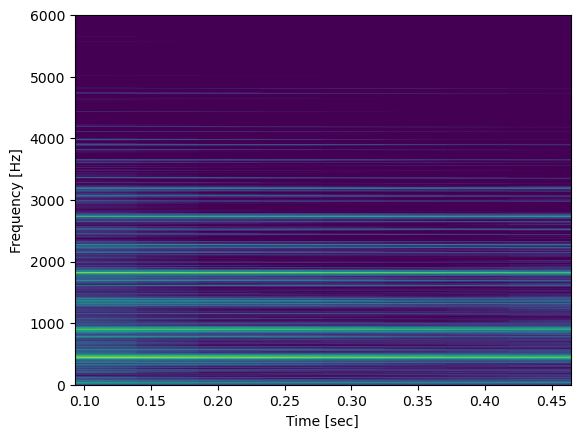

In [52]:
from scipy.signal import spectrogram
windows_len = 8192
fs, tt, S = spectrogram(S_synt, fs, nperseg=windows_len, noverlap= windows_len/2)


plot_spectrogram(fs, tt, S)
plt.ylim([0, 6000])

(0.0, 6000.0)

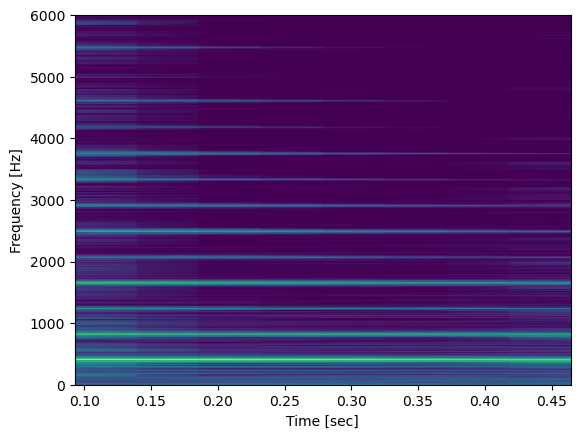

In [ ]:
fs=44100
fs, tt, S = spectrogram(reference, fs, nperseg=windows_len, noverlap= windows_len/2)

plot_spectrogram(fs, tt, S)
plt.ylim([0, 6000])



**2.7 Listen to the synthesized signal and compare it to the reference.**



In [51]:
fs=44100
Audio(S_synt,rate=fs)
save_audio("s_synt_lab4.wav",S_synt, fs)
